In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [7]:
df['location']=df['location'].fillna("Sarjapur  Road")

In [8]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [9]:
df['size']=df['size'].fillna('2 BHK')

In [10]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [12]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [13]:
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13320, dtype: int32

In [16]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])*float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13320 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   bhk           13320 non-null  int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 988.7+ KB


In [20]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [21]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
df['location']

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [29]:
import seaborn as sns
import numpy as np

<Axes: >

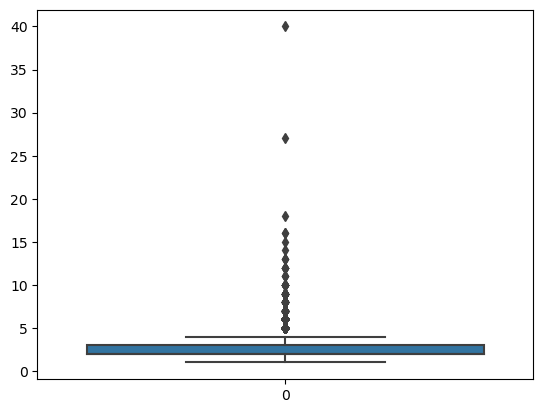

In [26]:
sns.boxplot(df['bath'])

In [30]:
def remove_outlier_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        
        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outlier_sqft(df)

In [31]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [38]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3,8571.428571
3,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
4,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000


In [39]:
df.drop(['balcony'],axis= 1 ,inplace=True)

In [40]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,150.0,3,8571.428571
3,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
4,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000


In [44]:
X=df.iloc[:,[1,2,4,5]].values

In [45]:
X

array([[1.67200000e+03, 3.00000000e+00, 3.00000000e+00, 8.97129187e+03],
       [1.75000000e+03, 3.00000000e+00, 3.00000000e+00, 8.51428571e+03],
       [1.75000000e+03, 3.00000000e+00, 3.00000000e+00, 8.57142857e+03],
       ...,
       [8.80000000e+02, 2.00000000e+00, 2.00000000e+00, 5.45454545e+03],
       [1.00000000e+03, 2.00000000e+00, 2.00000000e+00, 5.50000000e+03],
       [1.40000000e+03, 2.00000000e+00, 3.00000000e+00, 5.57142857e+03]])

In [46]:
y = df['price']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler


In [54]:
sts = StandardScaler()
x_train = sts.fit_transform(x_train)
x_test = sts.transform(x_test)

In [57]:
from sklearn.svm import SVR
sc = SVR()

In [58]:
sc.fit(x_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVR()

In [59]:
y_pred = sc.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,r2_score

In [64]:
r2_score(y_test,y_pred)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.2726039812007417